<a href="https://colab.research.google.com/github/dudns1234/Web-Scraping/blob/master/05_%EC%8B%A4%EC%8A%B5-%EB%84%A4%EC%9D%B4%EB%B2%84%EC%A6%9D%EA%B6%8C%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Crawling

1. requests : json
  - 비동기 통신을 활용한 방식 ( 동적 페이지 )
2. requests : html
  - 동기 통신을 활용한 방식 ( 정적 페이지 )
3. selenium : web browser
  - 1, 2번 방식으로 크롤링 불가능 할 때 사용한다.
  - 무조건 모든 내용을 크롤링 할 수 있다.
  - 매우 느리고 메모리도 많이 잡아 먹는다

In [ ]:
import requests

In [ ]:
url = "https://m.stock.naver.com/domestic/index/KOSPI"

In [ ]:
from bs4 import BeautifulSoup

res = requests.get(url)
page = res.content
page

b'<!DOCTYPE html>\n<html lang="ko">\n<head>\n  <meta charset="utf-8" />\n  <meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no">\n\n  <meta property="og:title" content="\xec\xbd\x94\xec\x8a\xa4\xed\x94\xbc - \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xec\xa6\x9d\xea\xb6\x8c" />\n  <meta property="og:type" content="article" />\n  <meta property="og:url" content="https://m.stock.naver.com/domestic/index/KOSPI" />\n  <meta property="og:description" content="\xea\xb4\x80\xec\x8b\xac\xec\xa2\x85\xeb\xaa\xa9\xec\x9d\x98 \xec\x8b\xa4\xec\x8b\x9c\xea\xb0\x84 \xec\xa3\xbc\xea\xb0\x80\xeb\xa5\xbc \xea\xb0\x80\xec\x9e\xa5 \xeb\xb9\xa0\xeb\xa5\xb4\xea\xb2\x8c \xed\x99\x95\xec\x9d\xb8\xed\x95\x98\xeb\x8a\x94 \xea\xb3\xb3"/>\n  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n  <meta property="og:article:author" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84\xec\xa6\x9d\xea\xb6\x8c"/>\n 

In [ ]:
soup = BeautifulSoup(page, 'html.parser')  # 비동기 처리로 인해 data는 안가져옴
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/>
<meta content="코스피 - 네이버 증권" property="og:title">
<meta content="article" property="og:type"/>
<meta content="https://m.stock.naver.com/domestic/index/KOSPI" property="og:url"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="네이버증권" property="og:article:author"/>
<meta content="https://m.stock.naver.com" property="og:article:author:url"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:article:thumbnailUrl"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/favicon.ico" rel="shortcut icon"/>
<link href="https://ssl.pstatic.net/imgstock/stock/build/prod/mobile/20220817173318/static/css/main.da7e438b.c

In [ ]:
soup.select("strong.GraphMain_price__3GnHd")

[]

In [ ]:
# 1. 웹 서비스 분석
url = "https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle"

In [ ]:
# 2. request, response
res = requests.get(url)
res

<Response [200]>

In [ ]:
# 3. Response Header에서 content-type이 application/json인 것을 확인
#  json형식으로 데이터를 받겠구나!!
datas = res.json()["priceInfos"]
datas[:2]

[{'localDate': '20220322',
  'closePrice': 2710.0,
  'openPrice': 2686.68,
  'highPrice': 2712.14,
  'lowPrice': 2686.58,
  'accumulatedTradingVolume': 489441,
  'foreignRetentionRate': 0.0},
 {'localDate': '20220323',
  'closePrice': 2735.05,
  'openPrice': 2727.12,
  'highPrice': 2742.27,
  'lowPrice': 2720.83,
  'accumulatedTradingVolume': 883375,
  'foreignRetentionRate': 0.0}]

In [ ]:
import pandas as pd

kospi_df = pd.DataFrame(datas)
kospi_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20220822,2462.50,2467.38,2475.77,2457.08,422552,0.0
106,20220823,2435.34,2449.31,2454.55,2431.83,471166,0.0
107,20220824,2447.45,2446.18,2454.01,2430.69,423502,0.0
108,20220825,2477.26,2459.79,2477.26,2455.32,426229,0.0
109,20220826,2481.03,2489.14,2497.76,2476.75,520091,0.0


In [ ]:
# 코스닥 데이터 가져오기
url = "https://api.stock.naver.com/chart/domestic/index/KOSDAQ?periodType=dayCandle"

res = requests.get(url)
res

<Response [200]>

In [ ]:
datas = res.json()["priceInfos"]
datas[:2]

[{'localDate': '20220322',
  'closePrice': 924.67,
  'openPrice': 916.7,
  'highPrice': 924.72,
  'lowPrice': 914.33,
  'accumulatedTradingVolume': 1392364,
  'foreignRetentionRate': 0.0},
 {'localDate': '20220323',
  'closePrice': 930.57,
  'openPrice': 929.35,
  'highPrice': 933.27,
  'lowPrice': 927.02,
  'accumulatedTradingVolume': 1442826,
  'foreignRetentionRate': 0.0}]

In [ ]:
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20220822,795.87,806.90,806.92,795.87,811881,0.0
106,20220823,783.42,789.95,793.81,781.92,855724,0.0
107,20220824,793.14,788.36,793.14,782.97,714898,0.0
108,20220825,807.37,795.18,807.37,794.16,630309,0.0
109,20220826,802.45,810.33,813.00,801.84,718360,0.0


In [ ]:
# USD 크롤링
url = "https://api.stock.naver.com/chart/domestic/marketindex/FX_USDKRW?periodType=month&range=6"

In [ ]:
res = requests.get(url)
res

<Response [200]>

In [ ]:
datas = res.json()["priceInfos"]
datas[:2]

[{'localDate': '20220228',
  'closePrice': 1204.5,
  'openPrice': 0.0,
  'highPrice': 1204.5,
  'lowPrice': 1204.5},
 {'localDate': '20220302',
  'closePrice': 1207.5,
  'openPrice': 0.0,
  'highPrice': 1207.5,
  'lowPrice': 1207.5}]

In [ ]:
usd_df = pd.DataFrame(datas)
usd_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice
119,20220822,1343.0,0.0,1343.0,1343.0
120,20220823,1338.0,0.0,1338.0,1338.0
121,20220824,1343.0,0.0,1343.0,1343.0
122,20220825,1337.5,0.0,1337.5,1337.5
123,20220826,1332.5,0.0,1332.5,1332.5


시각화

In [ ]:
kospi_df_0322 = kospi_df[kospi_df["localDate"] >= "20220322"]
kosdaq_df_0322 = kosdaq_df[kosdaq_df["localDate"] >= "20220322"]
usd_df_0322 = usd_df[usd_df["localDate"] >= "20220322"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # matplotlib을 활용해도 seaborn 스타일로 사용이 된다.

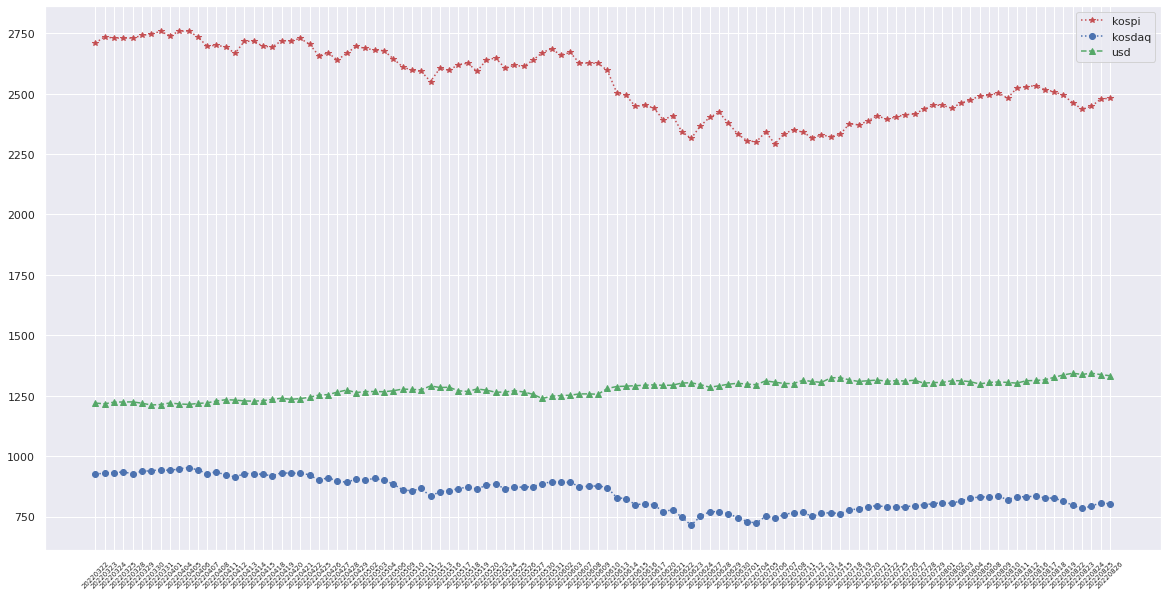

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(kospi_df_0322["localDate"], kospi_df_0322["closePrice"], "r*:", label="kospi")
plt.plot(kosdaq_df_0322["localDate"], kosdaq_df_0322["closePrice"], "bo:", label="kosdaq")
plt.plot(usd_df_0322["localDate"], usd_df_0322["closePrice"], "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [ ]:
# MinMax Scaling을 해주는 함수 사용하기
from sklearn.preprocessing import minmax_scale

In [ ]:
minmax_scale(kospi_df_0322["closePrice"])

array([0.89468953, 0.94830797, 0.93677091, 0.93745585, 0.93655686,
       0.96119352, 0.97332991, 0.99668229, 0.95858216, 0.99721741,
       1.        , 0.94826516, 0.86442347, 0.87411974, 0.85851581,
       0.80213618, 0.90858109, 0.90905199, 0.86485156, 0.85875126,
       0.91371819, 0.9132901 , 0.93366724, 0.88336651, 0.78152358,
       0.80545388, 0.74284552, 0.80369871, 0.8626897 , 0.84642223,
       0.83146043, 0.82527451, 0.75451101, 0.68237762, 0.65187611,
       0.64269355, 0.55238768, 0.66831482, 0.65191892, 0.70299022,
       0.71484835, 0.64284338, 0.74333783, 0.76065412, 0.67180376,
       0.69609795, 0.68588797, 0.74068366, 0.8083435 , 0.84310452,
       0.78550483, 0.81046255, 0.71561891, 0.71521223, 0.7136925 ,
       0.6503992 , 0.45484706, 0.43014619, 0.33256277, 0.34118881,
       0.31875682, 0.21194803, 0.25026221, 0.1087352 , 0.04775359,
       0.15965667, 0.2352576 , 0.27843062, 0.18403647, 0.08696676,
       0.02870353, 0.01783   , 0.10653053, 0.        , 0.09045

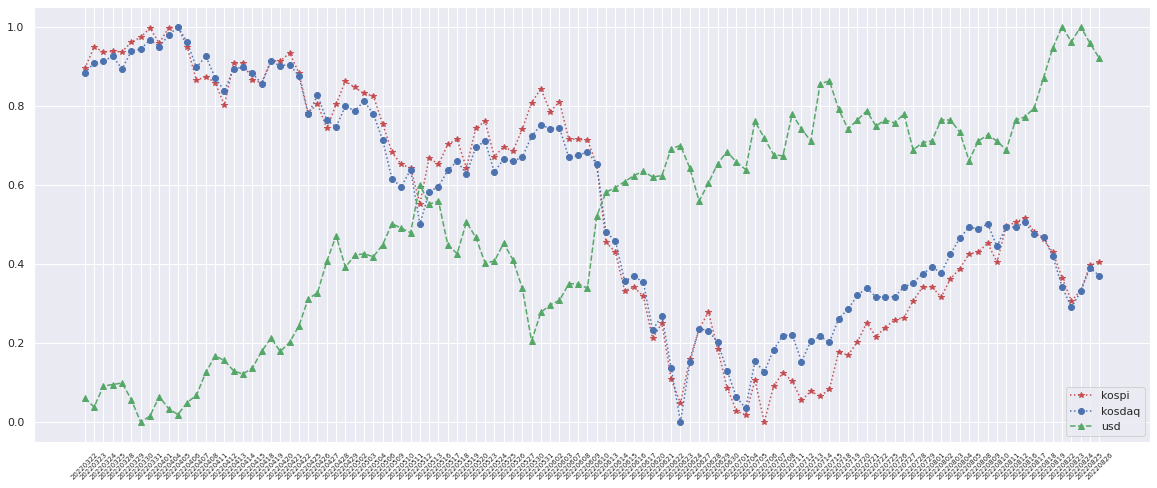

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(kospi_df_0322["localDate"], minmax_scale(kospi_df_0322["closePrice"]), "r*:", label="kospi")
plt.plot(kosdaq_df_0322["localDate"],minmax_scale(kosdaq_df_0322["closePrice"]), "bo:", label="kosdaq")
plt.plot(usd_df_0322["localDate"],   minmax_scale(usd_df_0322["closePrice"]), "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [ ]:
# 코스피, 코스닥, 미 환율 상관관계 확인
import numpy as np

# 코스피 : 코스닥 상관관계
np.corrcoef(kospi_df_0322["closePrice"], kosdaq_df_0322["closePrice"])[0, 1]

0.988630056908418

In [ ]:
# 코스피 : 미 달러 환율 상관관계
np.corrcoef(kospi_df_0322["closePrice"], usd_df_0322["closePrice"])[0, 1]

-0.8567964048638992

In [ ]:
# 코스닥 : 미 달러 환율 상관관계
np.corrcoef(kosdaq_df_0322["closePrice"], usd_df_0322["closePrice"])[0, 1]

-0.8680289254554155